# Milestone 2: Independent Project
Author: Ajai Shukla

explore the dataset supported by charts and summary statistics;
identify a likely distribution for several of the features;
compute basic summary statistics by both classical, bootstrap, and Bayesian methods;
compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods; and
leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant.

# Example: Probabilities of Eye and Hair Color

A sample population has the following probabilities of eye and hair color combinations. Execute the code to see the chart of conditional probabilities.

In [1]:
import pandas
import numpy
import matplotlib
from matplotlib import pyplot
import seaborn
import scipy
import itertools

%matplotlib inline

In [2]:
eye_hair = pandas.DataFrame({
    'black': [0.11, 0.03, 0.03, 0.01], 
    'brunette': [0.2, 0.14, 0.09, 0.05],
    'red': [0.04, 0.03, 0.02, 0.02],
    'blond': [0.01, 0.16, 0.02, 0.03],
}, index=['brown', 'blue', 'hazel', 'green'])

eye_hair

,black,brunette,red,blond
brown,0.11,0.20,0.04,0.01
blue,0.03,0.14,0.03,0.16
hazel,0.03,0.09,0.02,0.02
green,0.01,0.05,0.02,0.03


In [3]:
eye_hair.loc['hazel', 'red']

0.02

In [4]:
## Compute the marginal distribution of each eye color
eye_hair['marginal_eye'] = eye_hair.sum(axis=1)
eye_hair

,black,brunette,red,blond,marginal_eye
brown,0.11,0.20,0.04,0.01,0.36
blue,0.03,0.14,0.03,0.16,0.36
hazel,0.03,0.09,0.02,0.02,0.16
green,0.01,0.05,0.02,0.03,0.11


In [5]:
eye_hair.sum(axis=0)

black           0.18
brunette        0.48
red             0.11
blond           0.22
marginal_eye    0.99
dtype: float64

In [6]:
eye_hair.loc['marginal_hair'] = eye_hair.sum(axis=0)
eye_hair

,black,brunette,red,blond,marginal_eye
brown,0.11,0.20,0.04,0.01,0.36
blue,0.03,0.14,0.03,0.16,0.36
hazel,0.03,0.09,0.02,0.02,0.16
green,0.01,0.05,0.02,0.03,0.11
marginal_hair,0.18,0.48,0.11,0.22,0.99


In [8]:
drivers = ['yes','no','yes','no','no','yes','no','no','no','yes']
distracted = [1 if x is 'yes' else 0 for x in drivers]
distracted

[1, 0, 1, 0, 0, 1, 0, 0, 0, 1]

In [9]:
N = len(distracted)  # sample size
n_distracted = sum(distracted)  # number of distracted drivers
n_not = N - n_distracted # number not distracted
print('Distracted drivers = %d Attentive drivers = %d'
    '\nProbability of distracted driving = %.1f' 
      % (n_distracted, n_not, n_distracted / (n_distracted + n_not)))

Distracted drivers = 4 Attentive drivers = 6
Probability of distracted driving = 0.4


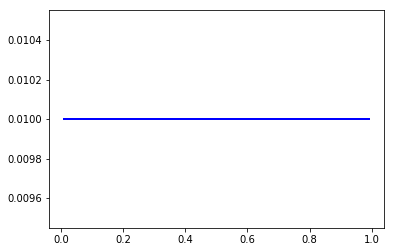

In [10]:
N = 100
p = numpy.linspace(.01, .99, num=N)
pp = [1./N] * N
pyplot.plot(p, pp, linewidth=2, color='blue')

Text(0, 0.5, 'Likelihood')

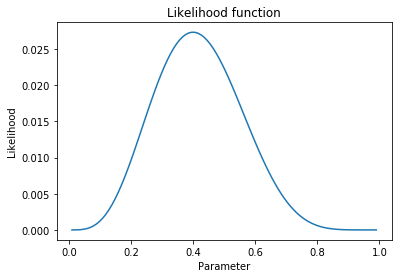

In [11]:
def likelihood(p, data):
    k = sum(data)
    N = len(data)
    # Compute Binomial likelihood
    l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k)
    # Normalize the likelihood to sum to unity
    return l/sum(l)

l = likelihood(p, distracted)
pyplot.plot(p, l)
pyplot.title('Likelihood function')
pyplot.xlabel('Parameter')
pyplot.ylabel('Likelihood')

In [12]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

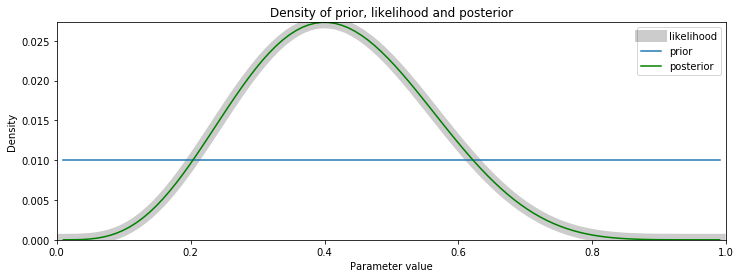

In [13]:
def plot_post(prior, like, post, x):
    maxy = max(max(prior), max(like), max(post))
    pyplot.figure(figsize=(12, 4))
    pyplot.plot(x, like, label='likelihood', linewidth=12, color='black', alpha=.2)
    pyplot.plot(x, prior, label='prior')
    pyplot.plot(x, post, label='posterior', color='green')
    pyplot.ylim(0, maxy)
    pyplot.xlim(0, 1)
    pyplot.title('Density of prior, likelihood and posterior')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.legend()
    
post = posterior(pp, l)
plot_post(pp, l, post, p)

In [14]:
print('Maximum of the prior density = %.3f' % max(pp))
print('Maximum likelihood = %.3f' % max(l))
print('MAP = %.3f' % max(post))

Maximum of the prior density = 0.010
Maximum likelihood = 0.027
MAP = 0.027


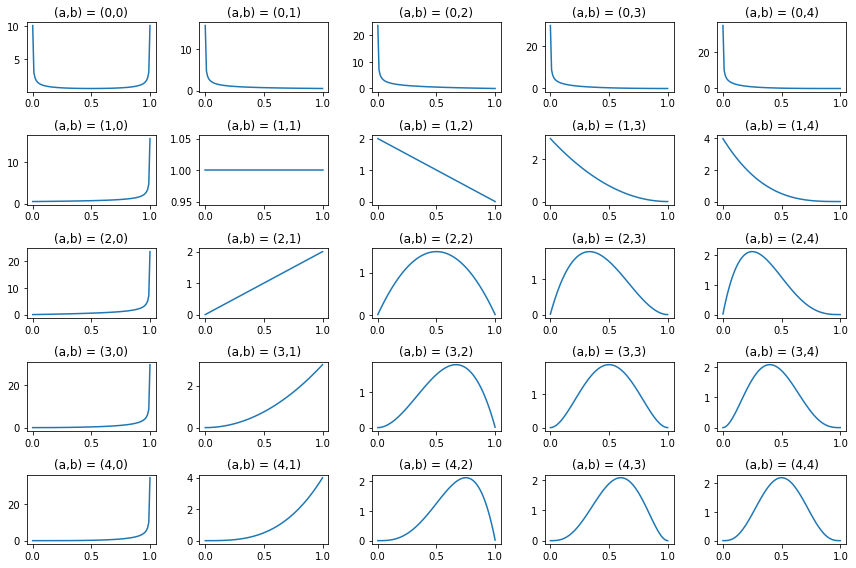

In [15]:
pyplot.figure(figsize=(12, 8))

alpha = [.5, 1, 2, 3, 4]
beta = alpha[:]
x = numpy.linspace(.001, .999, num=100)

for i, (a, b) in enumerate(itertools.product(alpha, beta)):
    pyplot.subplot(len(alpha), len(beta), i+1)
    pyplot.plot(x, scipy.stats.beta.pdf(x, a, b))
    pyplot.title('(a,b) = (%d,%d)' % (a,b))
pyplot.tight_layout() 

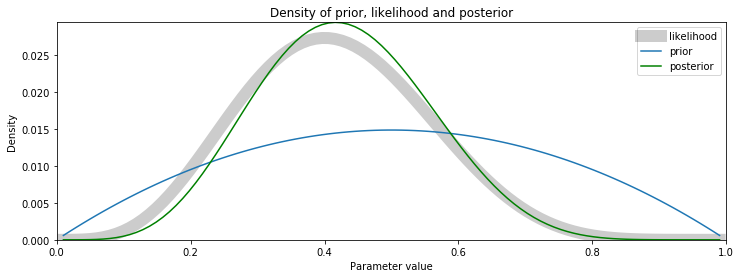

In [16]:
def beta_prior(x, a, b):
    l = scipy.stats.beta.pdf(p, a, b)  # compute likelihood
    return l / l.sum()  # normalize and return

pp = beta_prior(p, 2, 2)
post = posterior(pp, l)
plot_post(pp, l, post, p)

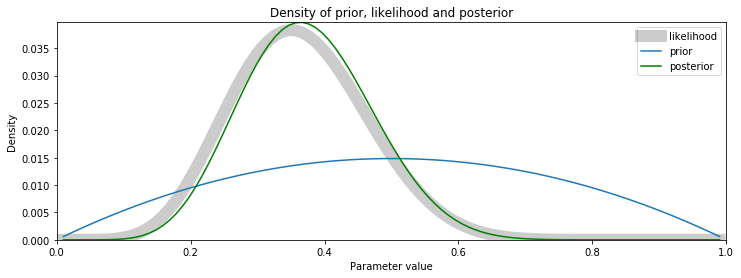

In [17]:
new_drivers = ['no','yes','no','no','no',
          'yes','no','yes','no','no']  # Some new data
new_distracted = [1 if x is 'yes' else 0 for x in new_drivers]

l = likelihood(p, distracted + new_distracted)
post = posterior(pp, l)
plot_post(pp, l, post, p)

The 0.950 credible interval is 0.025 to 0.975


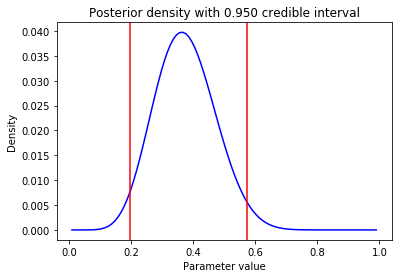

In [18]:
num_samples = 100000
lower_q, upper_q = [.025, .975]

def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = numpy.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    pyplot.title('Posterior density with %.3f credible interval' % interval)
    pyplot.plot(p, post, color='blue')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci[0], color='red')
    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, lower_q, upper_q))
    
plot_ci(p, post, num_samples, lower_q, upper_q)

# Simulating from the posterior distribution: forecasting
So far, we have computed the posterior distribution of the probability parameter But what about the distribution of distracted drivers? We can compute this distribution by simulating from the posterior distribution.The code in the cell below simulates and plots the distribution of distracted drivers. Run this code and examine the results.

Text(0, 0.5, 'Probability')

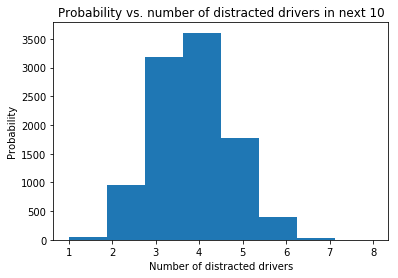

In [19]:
num_cars = 10
num_samples = 10000

counts = (10 * numpy.random.choice(p, size=num_samples, replace=True, p=post)).round()
pyplot.hist(counts, bins=int(max(counts)))
pyplot.title('Probability vs. number of distracted drivers in next %d' % num_cars)
pyplot.xlabel('Number of distracted drivers')
pyplot.ylabel('Probability')

In [20]:
families = pandas.read_csv('https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/GaltonFamilies.csv', 
                           index_col=0)
families.head()

,father,mother,midparentHeight,children,childNum,gender,childHeight
family,,,,,,,
001,78.5,67.0,75.43,4,1,male,73.2
001,78.5,67.0,75.43,4,2,female,69.2
001,78.5,67.0,75.43,4,3,female,69.0
001,78.5,67.0,75.43,4,4,female,69.0
002,75.5,66.5,73.66,4,1,male,73.5


Mean of heights: 67.2


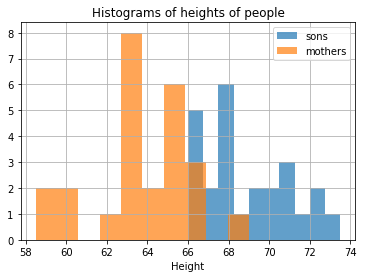

In [21]:
num_samples = 25
male = families[families.gender == 'male'].sample(n=num_samples)

pyplot.title('Histograms of heights of people')
male.childHeight.hist(label='sons', bins=10, alpha=.7)
male.mother.hist(label='mothers', bins=10, alpha=.7)
pyplot.xlabel('Height')
pyplot.legend()

mean_height = numpy.concatenate([male.mother, male.father, male.childHeight,]).mean()
print('Mean of heights: %.1f' % mean_height)

Mean = 68.844, Standard deviation = 2.163


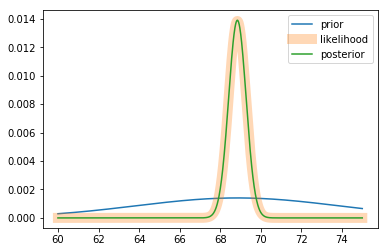

In [22]:
N = 1000
p = numpy.linspace(60, 75, num=N)

pp = scipy.stats.norm.pdf(p, loc=male.childHeight.mean(), scale=5)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = numpy.std(x)**2 # sigmasqr
    x_mean = numpy.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, numpy.std(x)))
    n = len(x)
    l = numpy.exp(-n * numpy.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_son = comp_like(p, male.childHeight)
post_son = posterior(pp, like_son)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_son, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_son, label='posterior')
pyplot.legend()

Mean = 68.844, Standard deviation = 2.163


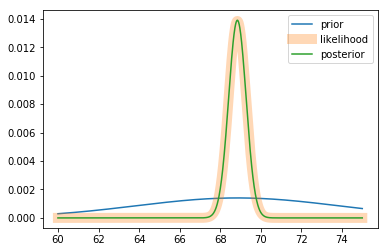

In [23]:
N = 1000
p = numpy.linspace(60, 75, num=N)

pp = scipy.stats.norm.pdf(p, loc=male.childHeight.mean(), scale=5)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = numpy.std(x)**2 # sigmasqr
    x_mean = numpy.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, numpy.std(x)))
    n = len(x)
    l = numpy.exp(-n * numpy.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_son = comp_like(p, male.childHeight)
post_son = posterior(pp, like_son)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_son, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_son, label='posterior')
pyplot.legend()

Mean = 63.660, Standard deviation = 2.374


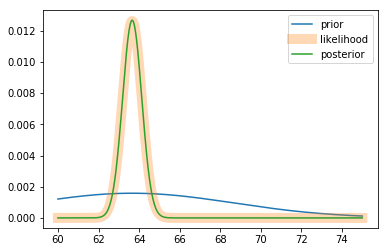

In [24]:
pp_mom = scipy.stats.norm.pdf(p, loc=male.mother.mean(), scale=5)
pp_mom = pp_mom / pp_mom.sum() # normalize

like_mom = comp_like(p, male.mother)
post_mom = posterior(pp_mom, like_mom)

pyplot.plot(p, pp_mom, label='prior')
pyplot.plot(p, like_mom, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_mom, label='posterior')
pyplot.legend()

The 0.950 credible interval is 0.025 to 0.975


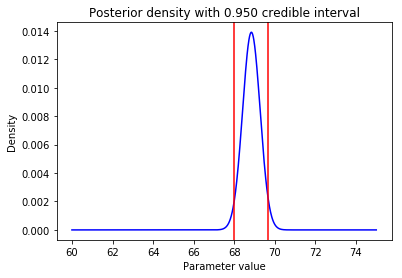

In [25]:
num_samples = 100000

plot_ci(p, post_son, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975


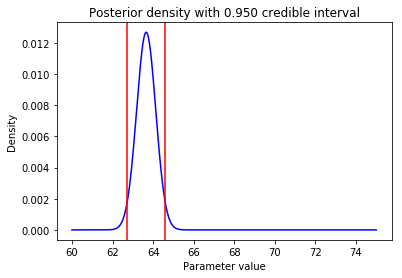

In [26]:
plot_ci(p, post_mom, num_samples, lower_q=.025, upper_q=.975)

# Simulation from the Posterior Distribution
The code in the cell below computes the posterior distribution of the heights of sons. This is done by computing the distribution of height based on realizations of the parameter (the mean) from the posterior distribution. The density distribution of the simulated heights is plotted along with the histogram of the original data. Execute this code and examine the results.

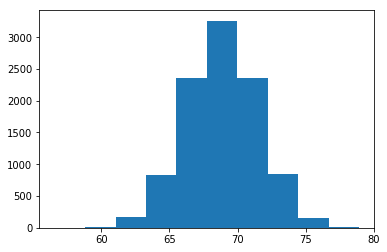

In [27]:
def sim_height(n, sigma, p, post):
    # create the probability-weighted random sample of values of the mean height
    mu = numpy.random.choice(p, size=n, replace=True, p=post)
    return scipy.stats.norm.rvs(loc=mu, scale=sigma, size=n)

_ = pyplot.hist(sim_height(10000, sigma=2.616329, p=p, post=post_son))

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


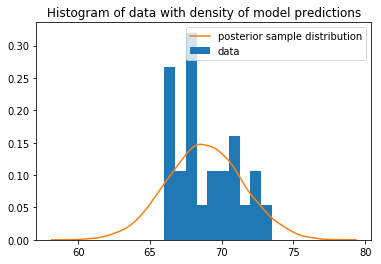

In [28]:
def plot_dist(n, post, dat):
    pyplot.hist(dat, normed=True, label='data')
    seaborn.kdeplot(post, label='posterior sample distribution')
    pyplot.title('Histogram of data with density of model predictions')

sim_vals = sim_height(10000, sigma=2.616329, p=p, post=post_son)
plot_dist(10000, sim_vals, male.childHeight)

# Summary
We have explored the following concepts:
dataset supported by charts and summary statistics;
identify a likely distribution for several of the features;
compute basic summary statistics by both classical, bootstrap, and Bayesian methods;
compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods; and
leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant.